In [1]:
import numpy as np
import pandas as pd

In [2]:
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.io

plotly.io.renderers.default = "jupyterlab+png"

In [3]:
import helpers

In [4]:
import logging

handler = logging.StreamHandler()
formatter = logging.Formatter("%(asctime)s - %(name)s - %(levelname)s - %(message)s")
handler.setFormatter(formatter)
logging.getLogger().addHandler(handler)

logging.getLogger("helpers").setLevel("DEBUG")
logger = logging.getLogger(__name__)
logger.setLevel("DEBUG")

In [5]:
rng = np.random.default_rng(seed=0)

# load data

## from `gs://liulab/ftp/GSE115978/GSE115978_tpm.csv`

In [6]:
from helpers.datasets import GENE_SYMBOL_COLUMN_NAME, SINGLE_CELL_COLUMN_NAME

x = pd.read_csv(
    "gs://liulab/ftp/GSE115978/GSE115978_tpm.csv",
    index_col=0,
    nrows=300,
)
x = x.rename_axis(index=GENE_SYMBOL_COLUMN_NAME, columns=SINGLE_CELL_COLUMN_NAME)
x = x.sort_index(axis="rows")
x = x.sort_index(axis="columns")
x

single_cell_id,CY106_CD45neg_CD90neg_10cells_S289,CY106_CD45neg_CD90neg_S291,CY106_CD45neg_CD90neg_S292,CY106_CD45neg_CD90neg_S294,CY106_CD45neg_CD90neg_S297,CY106_CD45neg_CD90neg_S301,CY106_CD45neg_CD90neg_S302,CY106_CD45neg_CD90neg_S308,CY106_CD45neg_CD90neg_S310,CY106_CD45neg_CD90neg_S320,...,monika_E9_S143_comb_BCD8_3,monika_F10_S145_comb_BCD8_3,monika_F1_S144_comb_BCD8_3,monika_F2_S146_comb_BCD8_3,monika_F4_S147_comb_BCD8_3,monika_F5_S148_comb_BCD8_3,monika_F6_S149_comb_BCD8_3,monika_F7_S150_comb_BCD8_3,monika_F8_S151_comb_BCD8_3,monika_F9_S152_comb_BCD8_3
gene_symbol,,,,,,,,,,,,,,,,,,,,,
ABCD4,0.000000,0.000000,0.000000,0.000000,0.000000,3.739848,2.279174,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.263034,0.000000,0.000000,2.412240,0.000000
ABR,0.077243,0.000000,0.000000,0.000000,0.000000,0.000000,5.525881,0.0,1.147307,0.000000,...,0.000000,3.472228,0.000000,0.000000,0.075875,0.812293,0.031395,0.000000,0.000000,0.000000
ADAM21P1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ADAM23,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AEN,0.000000,0.000000,3.872435,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,2.298952,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZHX3,0.008630,0.028569,0.000000,0.000000,0.025738,0.000000,0.000000,0.0,0.000000,0.000000,...,0.314986,0.968644,0.235114,0.255803,0.273814,0.212881,0.227741,0.355016,0.144046,1.136191
ZNF212,0.000000,0.000000,0.096262,0.000000,0.000000,4.116781,0.000000,0.0,0.000000,0.000000,...,3.833599,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ZNF257,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.189034,0.000000,0.321928


## TCGA SKCM bulk RNA-seq

### from derek's file

In [13]:
mixtures_tcga_skcm = helpers.datasets.load_tcga_skcm()
# mixtures_tcga_skcm = helpers.creating_mixtures.normalize_expression(mixtures_tcga_skcm, 1_000_000)

In [14]:
mixtures_tcga_skcm

sample_id,TCGA.3N.A9WB.06A.11R.A38C.07,TCGA.3N.A9WC.06A.11R.A38C.07,TCGA.3N.A9WD.06A.11R.A38C.07,TCGA.BF.A1PU.01A.11R.A18S.07,TCGA.BF.A1PV.01A.11R.A18U.07,TCGA.BF.A1PX.01A.12R.A18T.07,TCGA.BF.A1PZ.01A.11R.A18S.07,TCGA.BF.A1Q0.01A.21R.A18S.07,TCGA.BF.A3DJ.01A.11R.A20F.07,TCGA.BF.A3DL.01A.11R.A20F.07,...,TCGA.XV.AB01.06A.12R.A40A.07,TCGA.YD.A89C.06A.11R.A37K.07,TCGA.YD.A9TA.06A.11R.A39D.07,TCGA.YD.A9TB.06A.12R.A40A.07,TCGA.YG.AA3N.01A.11R.A38C.07,TCGA.YG.AA3O.06A.11R.A38C.07,TCGA.YG.AA3P.06A.11R.A38C.07,TCGA.Z2.A8RT.06A.11R.A37K.07,TCGA.Z2.AA3S.06A.11R.A39D.07,TCGA.Z2.AA3V.06A.11R.A39D.07
gene_symbol,,,,,,,,,,,,,,,,,,,,,
A1BG,381.0662,195.1822,360.8794,176.3994,216.8470,285.0608,424.5848,327.8758,232.2936,380.7694,...,428.9256,184.5297,88.4289,264.5184,238.8846,207.9831,33.5642,336.4070,349.4478,717.2209
A1CF,0.0000,0.0000,0.7092,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,1.3482,0.0000,0.0000,0.0000,0.0000,0.3876,0.0000,0.0000
A2BP1,0.0000,0.0000,6.3830,1.2987,0.0000,0.0000,0.0000,0.0000,0.0000,0.4901,...,0.0000,0.0000,0.0000,0.0000,0.5522,0.3380,66.0629,0.0000,0.2880,0.6539
A2LD1,250.1979,160.7548,97.1986,163.2338,60.8727,125.6900,78.8939,67.7049,92.9554,99.8579,...,47.5207,102.4404,36.9476,146.3544,88.2441,86.2831,50.0426,37.3178,152.9786,50.7438
A2M,2209.5194,169236.6356,18257.8865,6716.4513,1740.5828,32098.0014,3218.6418,6468.7807,377755.5402,7726.0377,...,17450.3581,20639.7659,12397.0606,25477.7594,10300.9056,37319.7533,8217.0591,22129.9496,4040.2938,46111.4664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYX,1236.2682,3594.4996,3270.2128,5132.1429,5128.2128,4675.7039,3177.7557,10974.0171,3042.2195,7198.7258,...,11526.1708,5296.0555,3701.5035,3021.2879,10181.1154,3125.3063,1925.4129,2865.1163,2136.9429,11832.5977
ZZEF1,622.7787,883.6696,1105.6738,1796.1039,1097.4298,1398.3316,1648.7663,1287.7062,1335.5161,1472.6783,...,1464.1873,852.6225,1245.0696,1078.7653,2362.7830,2671.3984,1480.5541,1849.6124,1640.4349,1413.1110
ZZZ3,721.3247,1137.8099,769.5035,286.0390,1658.9958,521.0288,651.4399,858.2361,962.2609,300.9066,...,224.5179,743.3897,958.9125,741.8840,1066.8139,940.5999,1003.7294,454.2636,1452.3724,102.0108


In [15]:
mixtures_tcga_skcm["TCGA.3N.A9WB.06A.11R.A38C.07"]

gene_symbol
A1BG          381.0662
A1CF            0.0000
A2BP1           0.0000
A2LD1         250.1979
A2M          2209.5194
               ...    
ZYX          1236.2682
ZZEF1         622.7787
ZZZ3          721.3247
psiTPTE22       2.8271
tAKR            0.0000
Name: TCGA.3N.A9WB.06A.11R.A38C.07, Length: 20531, dtype: float64

In [18]:
mixtures_tcga_skcm["TCGA.3N.A9WB.06A.11R.A38C.07"].loc["A1BG"]

381.0662

### from BigQuery table (isb-cgc-bq)

```
isb-cgc-bq.TCGA.RNAseq_hg38_gdc_current
```

docs:
1. https://isb-cancer-genomics-cloud.readthedocs.io/en/latest/sections/BigQuery.html
1. https://isb-cgc.appspot.com/bq_meta_search/
1. https://isb-cgc.appspot.com/cohorts/new_cohort/


my queries:
1. https://console.cloud.google.com/bigquery?p=isb-cgc-bq&d=TCGA&t=RNAseq_hg38_gdc_current&page=table&project=text-to-speech-api-329815&ws=!1m5!1m4!4m3!1sisb-cgc-bq!2sTCGA!3sRNAseq_hg38_gdc_current

In [6]:
query = '''
select *
from `isb-cgc-bq.TCGA.RNAseq_hg38_gdc_current` 
where aliquot_barcode = "TCGA-3N-A9WB-06A-11R-A38C-07"
limit 10
'''

df = pd.read_gbq(query, project_id="keen-dispatch-316219")
df = df.set_index("gene_name", drop=False)

In [7]:
df

,project_short_name,case_barcode,primary_site,sample_barcode,aliquot_barcode,gene_name,gene_type,Ensembl_gene_id,Ensembl_gene_id_v,HTSeq__Counts,HTSeq__FPKM,HTSeq__FPKM_UQ,sample_type_name,case_gdc_id,sample_gdc_id,aliquot_gdc_id,file_gdc_id_counts,file_gdc_id_fpkm,file_gdc_id_fpkm_uq,platform
gene_name,,,,,,,,,,,,,,,,,,,,
PTPRJ,TCGA-SKCM,TCGA-3N-A9WB,Skin,TCGA-3N-A9WB-06A,TCGA-3N-A9WB-06A-11R-A38C-07,PTPRJ,protein_coding,ENSG00000149177,ENSG00000149177.11,9924,19.261851,472344.703114,Metastatic,5564e6a7-2195-4b0d-994e-b0617b58e889,5b0c4070-1e90-4562-85e3-96dd34444e29,4c243ea9-dfe1-42f0-a887-3c901fb38542,48151fe4-7aa5-448f-9a3f-c69b77917c81,6f0f09df-cb9e-4ee6-9f0d-e0c7bb2aa001,a44af3c3-8e6d-4b34-a92c-993d687f0211,Illumina
TTC22,TCGA-SKCM,TCGA-3N-A9WB,Skin,TCGA-3N-A9WB-06A,TCGA-3N-A9WB-06A-11R-A38C-07,TTC22,protein_coding,ENSG00000006555,ENSG00000006555.9,15,0.046256,1134.290977,Metastatic,5564e6a7-2195-4b0d-994e-b0617b58e889,5b0c4070-1e90-4562-85e3-96dd34444e29,4c243ea9-dfe1-42f0-a887-3c901fb38542,48151fe4-7aa5-448f-9a3f-c69b77917c81,6f0f09df-cb9e-4ee6-9f0d-e0c7bb2aa001,a44af3c3-8e6d-4b34-a92c-993d687f0211,Illumina
RP4-647C14.3,TCGA-SKCM,TCGA-3N-A9WB,Skin,TCGA-3N-A9WB-06A,TCGA-3N-A9WB-06A-11R-A38C-07,RP4-647C14.3,antisense,ENSG00000258944,ENSG00000258944.1,17,0.408521,10017.867161,Metastatic,5564e6a7-2195-4b0d-994e-b0617b58e889,5b0c4070-1e90-4562-85e3-96dd34444e29,4c243ea9-dfe1-42f0-a887-3c901fb38542,48151fe4-7aa5-448f-9a3f-c69b77917c81,6f0f09df-cb9e-4ee6-9f0d-e0c7bb2aa001,a44af3c3-8e6d-4b34-a92c-993d687f0211,Illumina
RP11-324L17.1,TCGA-SKCM,TCGA-3N-A9WB,Skin,TCGA-3N-A9WB-06A,TCGA-3N-A9WB-06A-11R-A38C-07,RP11-324L17.1,lincRNA,ENSG00000272551,ENSG00000272551.1,39,0.895696,21964.505359,Metastatic,5564e6a7-2195-4b0d-994e-b0617b58e889,5b0c4070-1e90-4562-85e3-96dd34444e29,4c243ea9-dfe1-42f0-a887-3c901fb38542,48151fe4-7aa5-448f-9a3f-c69b77917c81,6f0f09df-cb9e-4ee6-9f0d-e0c7bb2aa001,a44af3c3-8e6d-4b34-a92c-993d687f0211,Illumina
TTC28,TCGA-SKCM,TCGA-3N-A9WB,Skin,TCGA-3N-A9WB-06A,TCGA-3N-A9WB-06A-11R-A38C-07,TTC28,protein_coding,ENSG00000100154,ENSG00000100154.13,254,0.375060,9197.340158,Metastatic,5564e6a7-2195-4b0d-994e-b0617b58e889,5b0c4070-1e90-4562-85e3-96dd34444e29,4c243ea9-dfe1-42f0-a887-3c901fb38542,48151fe4-7aa5-448f-9a3f-c69b77917c81,6f0f09df-cb9e-4ee6-9f0d-e0c7bb2aa001,a44af3c3-8e6d-4b34-a92c-993d687f0211,Illumina
CHD8,TCGA-SKCM,TCGA-3N-A9WB,Skin,TCGA-3N-A9WB-06A,TCGA-3N-A9WB-06A-11R-A38C-07,CHD8,protein_coding,ENSG00000100888,ENSG00000100888.11,3596,6.864719,168338.630664,Metastatic,5564e6a7-2195-4b0d-994e-b0617b58e889,5b0c4070-1e90-4562-85e3-96dd34444e29,4c243ea9-dfe1-42f0-a887-3c901fb38542,48151fe4-7aa5-448f-9a3f-c69b77917c81,6f0f09df-cb9e-4ee6-9f0d-e0c7bb2aa001,a44af3c3-8e6d-4b34-a92c-993d687f0211,Illumina
FAM83C,TCGA-SKCM,TCGA-3N-A9WB,Skin,TCGA-3N-A9WB-06A,TCGA-3N-A9WB-06A-11R-A38C-07,FAM83C,protein_coding,ENSG00000125998,ENSG00000125998.7,40,0.237479,5823.535235,Metastatic,5564e6a7-2195-4b0d-994e-b0617b58e889,5b0c4070-1e90-4562-85e3-96dd34444e29,4c243ea9-dfe1-42f0-a887-3c901fb38542,48151fe4-7aa5-448f-9a3f-c69b77917c81,6f0f09df-cb9e-4ee6-9f0d-e0c7bb2aa001,a44af3c3-8e6d-4b34-a92c-993d687f0211,Illumina
CCDC87,TCGA-SKCM,TCGA-3N-A9WB,Skin,TCGA-3N-A9WB-06A,TCGA-3N-A9WB-06A-11R-A38C-07,CCDC87,protein_coding,ENSG00000182791,ENSG00000182791.4,66,0.423776,10391.946431,Metastatic,5564e6a7-2195-4b0d-994e-b0617b58e889,5b0c4070-1e90-4562-85e3-96dd34444e29,4c243ea9-dfe1-42f0-a887-3c901fb38542,48151fe4-7aa5-448f-9a3f-c69b77917c81,6f0f09df-cb9e-4ee6-9f0d-e0c7bb2aa001,a44af3c3-8e6d-4b34-a92c-993d687f0211,Illumina
ENTPD5,TCGA-SKCM,TCGA-3N-A9WB,Skin,TCGA-3N-A9WB-06A,TCGA-3N-A9WB-06A-11R-A38C-07,ENTPD5,protein_coding,ENSG00000187097,ENSG00000187097.11,1150,2.068848,50732.900718,Metastatic,5564e6a7-2195-4b0d-994e-b0617b58e889,5b0c4070-1e90-4562-85e3-96dd34444e29,4c243ea9-dfe1-42f0-a887-3c901fb38542,48151fe4-7aa5-448f-9a3f-c69b77917c81,6f0f09df-cb9e-4ee6-9f0d-e0c7bb2aa001,a44af3c3-8e6d-4b34-a92c-993d687f0211,Illumina


In [8]:
pd.read_gbq('''
select 
    *
from 
    `isb-cgc-bq.TCGA.RNAseq_hg38_gdc_current` 
where 
    aliquot_barcode = "TCGA-3N-A9WB-06A-11R-A38C-07"
    and gene_type = "TEC"
''', project_id="keen-dispatch-316219")

,project_short_name,case_barcode,primary_site,sample_barcode,aliquot_barcode,gene_name,gene_type,Ensembl_gene_id,Ensembl_gene_id_v,HTSeq__Counts,HTSeq__FPKM,HTSeq__FPKM_UQ,sample_type_name,case_gdc_id,sample_gdc_id,aliquot_gdc_id,file_gdc_id_counts,file_gdc_id_fpkm,file_gdc_id_fpkm_uq,platform
0,TCGA-SKCM,TCGA-3N-A9WB,Skin,TCGA-3N-A9WB-06A,TCGA-3N-A9WB-06A-11R-A38C-07,RP11-46D1.2,TEC,ENSG00000279250,ENSG00000279250.1,0,0.000000,0.000000,Metastatic,5564e6a7-2195-4b0d-994e-b0617b58e889,5b0c4070-1e90-4562-85e3-96dd34444e29,4c243ea9-dfe1-42f0-a887-3c901fb38542,48151fe4-7aa5-448f-9a3f-c69b77917c81,6f0f09df-cb9e-4ee6-9f0d-e0c7bb2aa001,a44af3c3-8e6d-4b34-a92c-993d687f0211,Illumina
1,TCGA-SKCM,TCGA-3N-A9WB,Skin,TCGA-3N-A9WB-06A,TCGA-3N-A9WB-06A-11R-A38C-07,CEP83-AS1,TEC,ENSG00000278916,ENSG00000278916.1,48,0.361099,8854.964536,Metastatic,5564e6a7-2195-4b0d-994e-b0617b58e889,5b0c4070-1e90-4562-85e3-96dd34444e29,4c243ea9-dfe1-42f0-a887-3c901fb38542,48151fe4-7aa5-448f-9a3f-c69b77917c81,6f0f09df-cb9e-4ee6-9f0d-e0c7bb2aa001,a44af3c3-8e6d-4b34-a92c-993d687f0211,Illumina
2,TCGA-SKCM,TCGA-3N-A9WB,Skin,TCGA-3N-A9WB-06A,TCGA-3N-A9WB-06A-11R-A38C-07,RP11-113K21.6,TEC,ENSG00000279900,ENSG00000279900.1,2,0.082619,2025.997601,Metastatic,5564e6a7-2195-4b0d-994e-b0617b58e889,5b0c4070-1e90-4562-85e3-96dd34444e29,4c243ea9-dfe1-42f0-a887-3c901fb38542,48151fe4-7aa5-448f-9a3f-c69b77917c81,6f0f09df-cb9e-4ee6-9f0d-e0c7bb2aa001,a44af3c3-8e6d-4b34-a92c-993d687f0211,Illumina
3,TCGA-SKCM,TCGA-3N-A9WB,Skin,TCGA-3N-A9WB-06A,TCGA-3N-A9WB-06A-11R-A38C-07,RP11-749I16.3,TEC,ENSG00000279199,ENSG00000279199.1,19,0.159230,3904.682989,Metastatic,5564e6a7-2195-4b0d-994e-b0617b58e889,5b0c4070-1e90-4562-85e3-96dd34444e29,4c243ea9-dfe1-42f0-a887-3c901fb38542,48151fe4-7aa5-448f-9a3f-c69b77917c81,6f0f09df-cb9e-4ee6-9f0d-e0c7bb2aa001,a44af3c3-8e6d-4b34-a92c-993d687f0211,Illumina
4,TCGA-SKCM,TCGA-3N-A9WB,Skin,TCGA-3N-A9WB-06A,TCGA-3N-A9WB-06A-11R-A38C-07,RP11-121L10.2,TEC,ENSG00000280367,ENSG00000280367.1,12,0.066173,1622.712786,Metastatic,5564e6a7-2195-4b0d-994e-b0617b58e889,5b0c4070-1e90-4562-85e3-96dd34444e29,4c243ea9-dfe1-42f0-a887-3c901fb38542,48151fe4-7aa5-448f-9a3f-c69b77917c81,6f0f09df-cb9e-4ee6-9f0d-e0c7bb2aa001,a44af3c3-8e6d-4b34-a92c-993d687f0211,Illumina
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040,TCGA-SKCM,TCGA-3N-A9WB,Skin,TCGA-3N-A9WB-06A,TCGA-3N-A9WB-06A-11R-A38C-07,RP11-58O9.2,TEC,ENSG00000279806,ENSG00000279806.1,6,0.064534,1582.518864,Metastatic,5564e6a7-2195-4b0d-994e-b0617b58e889,5b0c4070-1e90-4562-85e3-96dd34444e29,4c243ea9-dfe1-42f0-a887-3c901fb38542,48151fe4-7aa5-448f-9a3f-c69b77917c81,6f0f09df-cb9e-4ee6-9f0d-e0c7bb2aa001,a44af3c3-8e6d-4b34-a92c-993d687f0211,Illumina
1041,TCGA-SKCM,TCGA-3N-A9WB,Skin,TCGA-3N-A9WB-06A,TCGA-3N-A9WB-06A-11R-A38C-07,RP11-119F19.5,TEC,ENSG00000280355,ENSG00000280355.1,8,0.070393,1726.203423,Metastatic,5564e6a7-2195-4b0d-994e-b0617b58e889,5b0c4070-1e90-4562-85e3-96dd34444e29,4c243ea9-dfe1-42f0-a887-3c901fb38542,48151fe4-7aa5-448f-9a3f-c69b77917c81,6f0f09df-cb9e-4ee6-9f0d-e0c7bb2aa001,a44af3c3-8e6d-4b34-a92c-993d687f0211,Illumina
1042,TCGA-SKCM,TCGA-3N-A9WB,Skin,TCGA-3N-A9WB-06A,TCGA-3N-A9WB-06A-11R-A38C-07,RP11-626G3.1,TEC,ENSG00000280182,ENSG00000280182.1,0,0.000000,0.000000,Metastatic,5564e6a7-2195-4b0d-994e-b0617b58e889,5b0c4070-1e90-4562-85e3-96dd34444e29,4c243ea9-dfe1-42f0-a887-3c901fb38542,48151fe4-7aa5-448f-9a3f-c69b77917c81,6f0f09df-cb9e-4ee6-9f0d-e0c7bb2aa001,a44af3c3-8e6d-4b34-a92c-993d687f0211,Illumina
1043,TCGA-SKCM,TCGA-3N-A9WB,Skin,TCGA-3N-A9WB-06A,TCGA-3N-A9WB-06A-11R-A38C-07,RP11-250B2.4,TEC,ENSG00000279022,ENSG00000279022.1,0,0.000000,0.000000,Metastatic,5564e6a7-2195-4b0d-994e-b0617b58e889,5b0c4070-1e90-4562-85e3-96dd34444e29,4c243ea9-dfe1-42f0-a887-3c901fb38542,48151fe4-7aa5-448f-9a3f-c69b77917c81,6f0f09df-cb9e-4ee6-9f0d-e0c7bb2aa001,a44af3c3-8e6d-4b34-a92c-993d687f0211,Illumina


In [18]:
query = """
SELECT 
    --project_short_name,
    --case_barcode,
    --sample_barcode,
    aliquot_barcode,
    --primary_site,
    gene_name,
    gene_type,
    Ensembl_gene_id,
    HTSeq__Counts,
    HTSeq__FPKM,
    HTSeq__FPKM_UQ,
    sample_type_name,
    platform
FROM `isb-cgc-bq.TCGA.RNAseq_hg38_gdc_current` 
where aliquot_barcode = "TCGA-3N-A9WB-06A-11R-A38C-07"
"""

df = (
    pd.read_gbq(query, project_id="keen-dispatch-316219")
    .set_index("gene_name", drop=False)
    .sort_index()
)

In [19]:
df

,aliquot_barcode,gene_name,gene_type,Ensembl_gene_id,HTSeq__Counts,HTSeq__FPKM,HTSeq__FPKM_UQ,sample_type_name,platform
gene_name,,,,,,,,,
5S_rRNA,TCGA-3N-A9WB-06A-11R-A38C-07,5S_rRNA,rRNA,ENSG00000272435,0,0.000000,0.000000,Metastatic,Illumina
5S_rRNA,TCGA-3N-A9WB-06A-11R-A38C-07,5S_rRNA,rRNA,ENSG00000274759,0,0.000000,0.000000,Metastatic,Illumina
5S_rRNA,TCGA-3N-A9WB-06A-11R-A38C-07,5S_rRNA,rRNA,ENSG00000277418,0,0.000000,0.000000,Metastatic,Illumina
5S_rRNA,TCGA-3N-A9WB-06A-11R-A38C-07,5S_rRNA,rRNA,ENSG00000274228,0,0.000000,0.000000,Metastatic,Illumina
5S_rRNA,TCGA-3N-A9WB-06A-11R-A38C-07,5S_rRNA,rRNA,ENSG00000277004,0,0.000000,0.000000,Metastatic,Illumina
...,...,...,...,...,...,...,...,...,...
uc_338,TCGA-3N-A9WB-06A-11R-A38C-07,uc_338,misc_RNA,ENSG00000277568,2,0.239382,5870.198178,Metastatic,Illumina
uc_338,TCGA-3N-A9WB-06A-11R-A38C-07,uc_338,misc_RNA,ENSG00000273621,0,0.000000,0.000000,Metastatic,Illumina
uc_338,TCGA-3N-A9WB-06A-11R-A38C-07,uc_338,misc_RNA,ENSG00000277306,0,0.000000,0.000000,Metastatic,Illumina


In [20]:
df.loc[df["gene_name"].str[:2] == "PU"]

,aliquot_barcode,gene_name,gene_type,Ensembl_gene_id,HTSeq__Counts,HTSeq__FPKM,HTSeq__FPKM_UQ,sample_type_name,platform
gene_name,,,,,,,,,
PUF60,TCGA-3N-A9WB-06A-11R-A38C-07,PUF60,protein_coding,ENSG00000179950,10463,36.018273,883250.537565,Metastatic,Illumina
PUM1,TCGA-3N-A9WB-06A-11R-A38C-07,PUM1,protein_coding,ENSG00000134644,2841,8.011872,196469.442052,Metastatic,Illumina
PUM2,TCGA-3N-A9WB-06A-11R-A38C-07,PUM2,protein_coding,ENSG00000055917,5447,14.575140,357415.823882,Metastatic,Illumina
PURA,TCGA-3N-A9WB-06A-11R-A38C-07,PURA,protein_coding,ENSG00000185129,2854,4.373355,107244.690749,Metastatic,Illumina
PURB,TCGA-3N-A9WB-06A-11R-A38C-07,PURB,protein_coding,ENSG00000146676,6803,14.006428,343469.703377,Metastatic,Illumina
PURG,TCGA-3N-A9WB-06A-11R-A38C-07,PURG,protein_coding,ENSG00000172733,0,0.000000,0.000000,Metastatic,Illumina
PUS1,TCGA-3N-A9WB-06A-11R-A38C-07,PUS1,protein_coding,ENSG00000177192,1593,5.189146,127249.756524,Metastatic,Illumina
PUS10,TCGA-3N-A9WB-06A-11R-A38C-07,PUS10,protein_coding,ENSG00000162927,312,0.761417,18671.695577,Metastatic,Illumina
PUS3,TCGA-3N-A9WB-06A-11R-A38C-07,PUS3,protein_coding,ENSG00000110060,675,6.270383,153764.146301,Metastatic,Illumina


In [21]:
df.loc[df["gene_type"] == "protein_coding"]

,aliquot_barcode,gene_name,gene_type,Ensembl_gene_id,HTSeq__Counts,HTSeq__FPKM,HTSeq__FPKM_UQ,sample_type_name,platform
gene_name,,,,,,,,,
A1BG,TCGA-3N-A9WB-06A-11R-A38C-07,A1BG,protein_coding,ENSG00000121410,68,0.316945,7772.224447,Metastatic,Illumina
A1CF,TCGA-3N-A9WB-06A-11R-A38C-07,A1CF,protein_coding,ENSG00000148584,0,0.000000,0.000000,Metastatic,Illumina
A2M,TCGA-3N-A9WB-06A-11R-A38C-07,A2M,protein_coding,ENSG00000175899,5928,17.338106,425170.068027,Metastatic,Illumina
A2ML1,TCGA-3N-A9WB-06A-11R-A38C-07,A2ML1,protein_coding,ENSG00000166535,34,0.086929,2131.694587,Metastatic,Illumina
A3GALT2,TCGA-3N-A9WB-06A-11R-A38C-07,A3GALT2,protein_coding,ENSG00000184389,1,0.018252,447.581093,Metastatic,Illumina
...,...,...,...,...,...,...,...,...,...
ZYG11B,TCGA-3N-A9WB-06A-11R-A38C-07,ZYG11B,protein_coding,ENSG00000162378,1687,3.842320,94222.480780,Metastatic,Illumina
ZYX,TCGA-3N-A9WB-06A-11R-A38C-07,ZYX,protein_coding,ENSG00000159840,3277,17.572519,430918.401912,Metastatic,Illumina
ZZEF1,TCGA-3N-A9WB-06A-11R-A38C-07,ZZEF1,protein_coding,ENSG00000074755,1667,1.960316,48071.444028,Metastatic,Illumina


In [29]:
df.gene_type.value_counts().index

Index(['protein_coding', 'processed_pseudogene', 'lincRNA', 'antisense',
       'miRNA', 'unprocessed_pseudogene', 'misc_RNA', 'snRNA', 'TEC', 'snoRNA',
       'sense_intronic', 'transcribed_unprocessed_pseudogene', 'rRNA',
       'processed_transcript', 'transcribed_processed_pseudogene',
       'sense_overlapping', 'IG_V_pseudogene', 'unitary_pseudogene',
       'IG_V_gene', 'TR_V_gene', 'TR_J_gene', 'polymorphic_pseudogene',
       'scaRNA', 'IG_D_gene', 'pseudogene', 'TR_V_pseudogene',
       '3prime_overlapping_ncrna', 'Mt_tRNA', 'sRNA', 'IG_J_gene', 'IG_C_gene',
       'IG_C_pseudogene', 'ribozyme', 'TR_C_gene', 'TR_J_pseudogene',
       'non_coding', 'TR_D_gene', 'IG_J_pseudogene', 'Mt_rRNA', 'macro_lncRNA',
       'translated_unprocessed_pseudogene', 'translated_processed_pseudogene',
       'transcribed_unitary_pseudogene', 'vaultRNA'],
      dtype='object')

In [14]:
df.groupby("gene_type").agg(
    count=("gene_name", "count"),
    HTSeq__Counts_sum=("HTSeq__Counts", "sum"),
    HTSeq__Counts_zero_frac=("HTSeq__Counts", lambda x: (x == 0).mean()),
    HTSeq__FPKM=("HTSeq__FPKM", "sum"),
    HTSeq__FPKM_UQ=("HTSeq__FPKM_UQ", "sum"),
).sort_values("count", ascending=False)

,count,HTSeq__Counts_sum,HTSeq__Counts_zero_frac,HTSeq__FPKM,HTSeq__FPKM_UQ
gene_type,,,,,
protein_coding,19814,53556682,0.151660,315770.644943,7.743419e+09
processed_pseudogene,10304,64149,0.716227,2575.963151,6.316852e+07
lincRNA,7656,265760,0.643025,2287.734186,5.610048e+07
antisense,5565,213977,0.472597,2265.225431,5.554852e+07
miRNA,4093,1301,0.926948,276.178049,6.772518e+06
unprocessed_pseudogene,2574,52477,0.839938,1241.208476,3.043727e+07
misc_RNA,2298,1216,0.887293,115.748213,2.838411e+06
snRNA,1896,476,0.907173,82.787552,2.030140e+06
TEC,1045,22860,0.563636,309.492650,7.589469e+06


In [26]:
np.log10(df["HTSeq__Counts"] + 1).describe()

count    60483.000000
mean         0.907328
std          1.288110
min          0.000000
25%          0.000000
50%          0.000000
75%          1.591065
max          5.860193
Name: HTSeq__Counts, dtype: float64

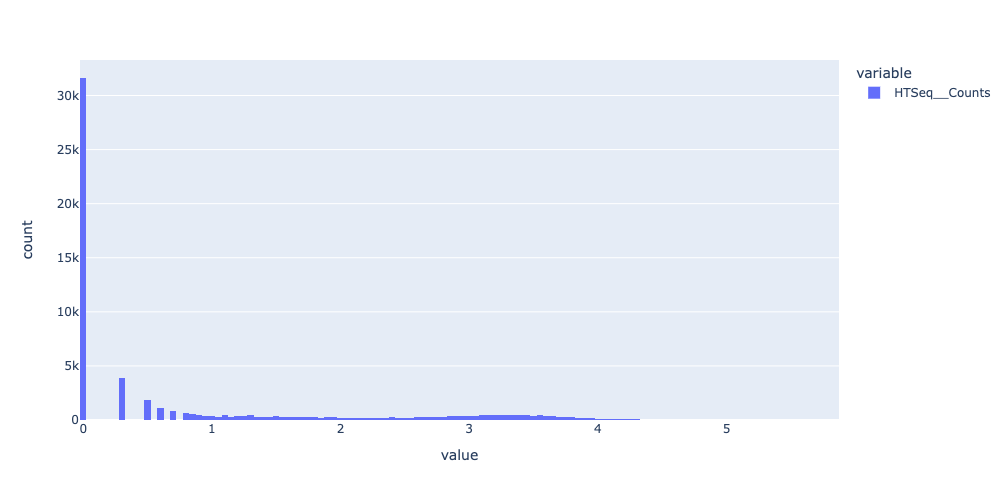

In [24]:
px.histogram(np.log10(df["HTSeq__Counts"] + 1))

In [19]:
df.loc["A1BG"]

project_short_name                       TCGA-SKCM
case_barcode                          TCGA-3N-A9WB
aliquot_barcode       TCGA-3N-A9WB-06A-11R-A38C-07
primary_site                                  Skin
sample_barcode                    TCGA-3N-A9WB-06A
aliquot_barcode_1     TCGA-3N-A9WB-06A-11R-A38C-07
gene_name                                     A1BG
gene_type                           protein_coding
HTSeq__Counts                                   68
HTSeq__FPKM                               0.316945
HTSeq__FPKM_UQ                         7772.224447
sample_type_name                        Metastatic
platform                                  Illumina
Name: A1BG, dtype: object

## Jerby-Arnon scRNA-seq

In [ ]:
sc_data, sc_metadata = helpers.datasets.load_jerby_arnon()
sc_data = helpers.creating_mixtures.normalize_expression(sc_data, 1_000_000)

In [ ]:
sc_data

In [ ]:
sc_metadata

## pseudobulks from Jerby-Arnon scRNA-seq

### fractions from csx of TCGA SKCM

In [ ]:
fractions = helpers.datasets.load_tcga_skcm_fractions_from_csx()

In [ ]:
fractions

### compute pseudobulks

In [ ]:
# import importlib
# importlib.reload(helpers.creating_mixtures)

In [ ]:
mixtures_in_silico, cell_type_geps = helpers.creating_mixtures.make_mixtures(
    sc_data, sc_metadata, fractions, n_cells_per_gep=5, normalization_factor=1_000_000, rng=rng
)

In [ ]:
helpers.creating_mixtures.make_cell_type_geps(sc_data, sc_metadata, rng=rng)

In [ ]:
x = sc_metadata.groupby("cell.types")

In [ ]:
for thing in x.groups.values():
    print(thing)

In [ ]:
type(thing)

In [ ]:
sc_metadata.groupby("cell.types").apply(lambda group: list(rng.choice(group.index, 3)))

In [ ]:
metadata = pd.read_csv(
    "gs://liulab/ftp/GSE115978/GSE115978_cell.annotations.csv",
    na_values={"cell.types": "?"},
)
metadata = metadata.replace({"cell.types": helpers.cell_type_naming.weird_to_nice})
metadata = metadata.rename(columns={"cells": helpers.datasets.SINGLE_CELL_COLUMN_NAME})
metadata = metadata.set_index(helpers.datasets.SINGLE_CELL_COLUMN_NAME, drop=False)
metadata = metadata.sort_index()
# metadata = metadata.sort_index(axis="columns")


In [ ]:
metadata